In [1]:
# load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Using the folllowing for references
# https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/


In [2]:
output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Load the data into a dataframe
housing_train = pd.read_csv("../../data/raw/dsc630_project/train.csv",sep=",")
housing_test = pd.read_csv("../../data/raw/dsc630_project/test.csv",sep=",")

In [4]:
print("Training set dimension :", housing_train.shape)
print("Test set dimension :", housing_test.shape)

Training set dimension : (1460, 81)
Test set dimension : (1459, 80)


In [5]:
# Viewing the top 5 and the bottom 5 rows in the dataframe
housing_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [6]:
# Checking the info on the dataframe for the training set
# This shows the number of columns with the data types 
# float64(3), int64(35), object(43)
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# store columns with specific data type
integer_columns = housing_train.select_dtypes(include=['int64']).columns
float_columns = housing_train.select_dtypes(include=['float64']).columns
object_columns = housing_train.select_dtypes(include=['object']).columns
  
# display columns
print('\nint64 columns:\n',integer_columns)
print('\nfloat64 columns:\n',float_columns)
print('\nobject columns:\n',object_columns)


int64 columns:
 Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

float64 columns:
 Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

object columns:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 

In [34]:
# Getting the integer columns into a separate dataframe

print("Number of integer columns: ",len(integer_columns))
df_int = housing_train[integer_columns]
# df_int.shape
# This displays a table of detailed distribution information for each of the 35 attributes(integer) in our dataframe
# We can start reviewing the statistics and collect interesting facts about the feature set
df_int.describe()

Number of integer columns:  35


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


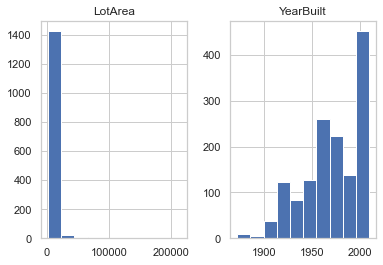

In [38]:
df_int[['LotArea','','YearBuilt']].hist();

In [ ]:
# explore the relationships between the attributes
# distribution of the interactions of each pair of attributes
from pandas.plotting import scatter_matrix
scatter_matrix(df_int, alpha=0.2, figsize=(6, 6), diagonal='kde')


In [7]:
## See the values of the object data types
housing_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [8]:
# Number of missing data per column
# List of columns with missing values

column_with_nan = housing_train.columns[housing_train.isnull().any()]
for column in column_with_nan:
    print(column, housing_train[column].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [9]:
# Top 5 columns with largest number of missing data
housing_train.isnull().sum().nlargest(5)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [10]:
### Planning to drop the following columns
### One of the major reason for that is as more than 50% of the rows are Null for those columns

# PoolQC
# MiscFeature
# Alley
# Fence
# Below is the list of columns to be dropped
cols_to_drop=['PoolQC','MiscFeature','Alley','Fence']
# Making a copy of the training dataframe to be worked on
housing_train_drop = housing_train
print("Dimension before drop:", housing_train_drop.shape)
housing_train_drop = housing_train_drop.drop(cols_to_drop,axis=1)
print("Dimension after drop:", housing_train_drop.shape)
print("Dimension of original dataframe:", housing_train.shape)


Dimension before drop: (1460, 81)
Dimension after drop: (1460, 77)
Dimension of original dataframe: (1460, 81)


In [11]:
housing_train_drop.shape

(1460, 77)

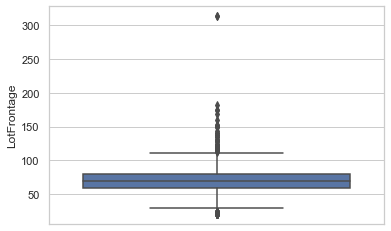

In [12]:
# Draw vertical boxplot with the LotFrontage values
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y="LotFrontage", data=housing_train)

In [13]:
housing_train.groupby(['LotFrontage'])['Id'].count()

LotFrontage
21.0     23
24.0     19
30.0      6
32.0      5
33.0      1
         ..
160.0     1
168.0     1
174.0     2
182.0     1
313.0     2
Name: Id, Length: 110, dtype: int64

In [14]:
#### Fill up the missing values for the below with mean values
# LotFrontage
housing_train['LotFrontage'] = housing_train['LotFrontage'].fillna(df['LotFrontage'].mean())

NameError: name 'df' is not defined

In [15]:
#### Fill up the missing values for the below with mode
#### These are categorical values so taking the mode is because I want to replace with the 
#### most number of occurance of that value
# BsmtExposure
housing_train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [16]:
housing_train['BsmtExposure']=housing_train['BsmtExposure'].fillna(housing_train['BsmtExposure'].mode()[0])

In [17]:
housing_train['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [18]:
housing_train['BsmtExposure'].isnull().sum()

0

In [19]:
housing_train['LotArea'].value_counts(sort=True)

7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

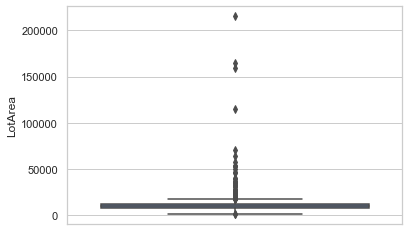

In [26]:
# Draw vertical boxplot with the LotFrontage values
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y="LotArea", data=housing_train)

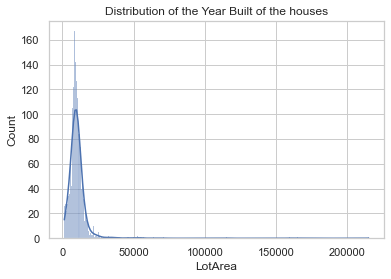

In [27]:
# SHowing the distribution of the variable Year Built
sns.histplot(housing_train.LotArea, kde=True)
plt.title("Distribution of the Lot Area of the houses")
plt.show() 

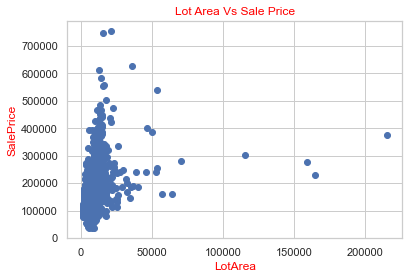

In [20]:
# Scatter Plot showing lot Area and saleprice

plt.scatter(housing_train['LotArea'],housing_train['SalePrice'])
plt.xlabel('LotArea', color='red')
plt.ylabel('SalePrice', color='red')
plt.title('Lot Area Vs Sale Price', color='red')
plt.show()

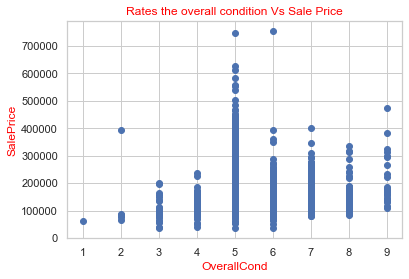

In [39]:
# Scatter Plot showing OverallCond: Rates the overall condition of the house and saleprice

plt.scatter(housing_train['OverallCond'],housing_train['SalePrice'])
plt.xlabel('OverallCond', color='red')
plt.ylabel('SalePrice', color='red')
plt.title('Rates the overall condition Vs Sale Price', color='red')
plt.show()

In [21]:
# subset of the dataframe 

housing_train_saleyr = housing_train[['Neighborhood','YearBuilt','MoSold','YrSold','SalePrice']]
print("Dimension of the dataframe:",housing_train_saleyr.shape)



Dimension of the dataframe: (1460, 5)


In [22]:
housing_train[['Neighborhood','YearBuilt','MoSold','YrSold','SalePrice']].value_counts()

Neighborhood  YearBuilt  MoSold  YrSold  SalePrice
Edwards       2004       4       2006    130000       2
Blmngtn       2003       5       2006    215000       1
NridgHt       2004       7       2008    207000       1
              2005       6       2006    185850       1
                         5       2010    220000       1
                                                     ..
Gilbert       2005       7       2006    192140       1
                         6       2009    174000       1
                                 2006    239900       1
                         3       2009    174000       1
Veenker       1996       12      2008    245500       1
Length: 1459, dtype: int64

In [23]:
housing_train_saleyr[(housing_train.YearBuilt == 2004)]


,Neighborhood,YearBuilt,MoSold,YrSold,SalePrice
6,Somerst,2004,8,2007,307000
18,SawyerW,2004,6,2008,159000
35,NridgHt,2004,9,2006,309000
57,CollgCr,2004,8,2006,196500
60,SawyerW,2004,5,2006,158000
65,NridgHt,2004,10,2007,317000
145,Edwards,2004,4,2006,130000
148,SawyerW,2004,4,2008,141000
158,Somerst,2004,5,2010,254900
168,Gilbert,2004,5,2007,183500


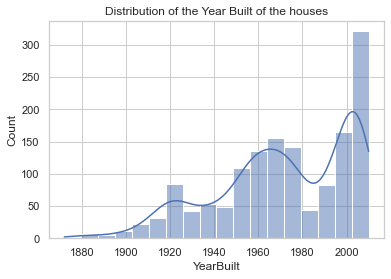

In [24]:
# SHowing the distribution of the variable Year Built
sns.histplot(housing_train_saleyr.YearBuilt, kde=True)
plt.title("Distribution of the Year Built of the houses")
plt.show() 

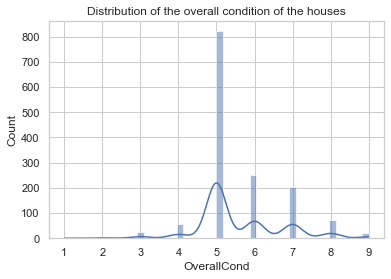

In [41]:
# Showing the distribution of the variable OverallCond
sns.histplot(housing_train.OverallCond, kde=True)
plt.title("Distribution of the overall condition of the houses")
plt.show() 

In [ ]:
housing_train.dtypes 

# column_name=housing_train.dtypes.index[0]
# v = housing_train.dtypes.values[3]
# def segregate_cols (df):
    # string_cols=[]
    # int_cols=[]
    # for 